## Set Up Environment

In [12]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 218 kB 4.1 MB/s 


In [106]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import stem
import os
import PyPDF2
from PyPDF2 import PdfFileReader
import numpy as np
from sklearn.feature_extraction import text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Read From PDFs in the Same Folder

In [18]:
def pdf2text(pdf):
    '''Iterate over pages and extract text'''
    text = ''
    for i in range(pdf.getNumPages()):
        page = pdf.getPage(i)
        text = text + page.extractText()
    return text
 
def stem_tokenize(document):
    '''return stemmed words longer than 2 chars and all alpha'''
    tokens = [stem(w) for w in document.split() if len(w) > 2 and w.isalpha()]
    return tokens
 
def tokenize(document):
    '''return words longer than 2 chars and all alpha'''
    tokens = [w for w in document.split() if len(w) > 2 and w.isalpha()]
    return tokens
 
def build_corpus_from_dir(dir_path):
    corpus = []
    for root, dirs, filenames in os.walk(dir_path):
        for name in filenames:
            print(name)
            f  = os.path.join(root, name)
            pdf = PdfFileReader(f, 'rb')
            document = pdf2text(pdf)
            corpus.append(document)
    return corpus

In [64]:
corpus = build_corpus_from_dir('/content/drive/MyDrive/CSIT_Internship/Papers')

Chinese NER Applications and Challenges.pdf


KeyboardInterrupt: ignored

In [104]:
print(tokenize(corpus[0]))

['Zhaoquan', 'Aiping', 'New', 'Knowledge', 'Representation', 'Survey', 'LNCS', 'Methods', 'and', 'ApplicationsLecture', 'Notes', 'Computer', 'Science', 'Founding', 'Editors', 'Gerhard', 'GoosKarlsruhe', 'Institute', 'GermanyJuris', 'HartmanisCornell', 'USA', 'Editorial', 'Board', 'Members', 'Elisa', 'BertinoPurdue', 'West', 'USAWen', 'GaoPeking', 'ChinaBernhard', 'Steffen', 'Dortmund', 'GermanyGerhard', 'Woeginger', 'RWTH', 'GermanyMoti', 'YungColumbia', 'New', 'USA', 'More', 'information', 'about', 'this', 'subseries', 'Yan', 'Jia', 'Aiping', 'New', 'KnowledgeRepresentation', 'Model', 'Methods', 'and', 'Applications', 'JiaHarbin', 'Institute', 'China', 'Zhaoquan', 'Guangzhou', 'China', 'Aiping', 'LiNational', 'University', 'Defense', 'China', 'ISSN', 'ISSN', 'Notes', 'Computer', 'ScienceISBN', 'ISBN', 'LNCS', 'Systems', 'and', 'and', 'Nature', 'Switzerland', 'work', 'subject', 'All', 'rights', 'are', 'reserved', 'the', 'whether', 'the', 'whole', 'part', 'thematerial', 'speciﬁcally', '

## Perform TF-IDF on text (displays wordcloud for each document)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


doc
knowledge 0.3481193467653184
model 0.25912989785709795
attack 0.2231957269626543
data 0.22039873874678437
graph 0.21623363253134673
entity 0.2065661819216724
diﬀerent 0.17099672630203352
network 0.15815223303378043
information 0.13694231256860873
relation 0.13499741550160543
mdata 0.1286975361115305
learning 0.12449301142600792
social 0.12274464257971143
based 0.12080432960597805
method 0.10697177278086606
attacks 0.10529798409125224
embedding 0.10374417618833993
entities 0.10197929496097063
security 0.09629815639114521
detection 0.09151184448425595
representation 0.09076691174536652
methods 0.09037270459073167
apt 0.08729832869103818
reasoning 0.07919848376094185
conference 0.07884557390313836


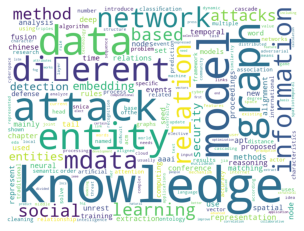

doc
model 0.2989242410157565
word 0.2989242410157565
named 0.17245629289370568
using 0.17245629289370568
use 0.1667077497972488
dropout 0.15536131854470098
ner 0.14644613085777514
stack 0.13801410268221345
entity 0.13796503431496454
models 0.13796503431496454
embeddings 0.13313284623434102
sequence 0.13221649121850768
lstm 0.11981956161090691
char 0.119612222324585
representations 0.11497086192913711
output 0.10650627698747282
learning 0.1034737757362234
buffer 0.10098416708633182
pretrain 0.10098416708633182
tagging 0.09984963467575578
data 0.09772523263976654
labeled 0.09321679112682059
pages 0.0920094017881423
training 0.09197668954330969
chunks 0.08976370407673939


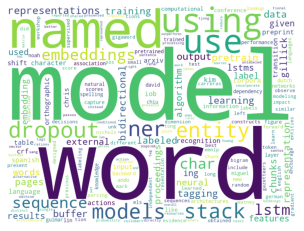

doc
ontonotes 0.26515336575171683
word 0.2278692942739467
lexicon 0.2190984468299171
collobert 0.18937412679590118
pages 0.1753464136999085
embeddings 0.17252769110369182
neural 0.17090197070546004
features 0.14715597182373716
lstm 0.13193294025576432
model 0.13146305438881542
senna 0.1283000156863146
table 0.1270809525758549
character 0.1243531725250881
feature 0.12178425254378246
ner 0.12178425254378246
emb 0.11974668130722697
using 0.11831674894993387
matches 0.11222170476794144
set 0.1116355648318006
learning 0.10955254532401285
network 0.10955254532401285
training 0.10955254532401285
partial 0.10658843359293266
named 0.10517044351105233
glove 0.1026400125490517


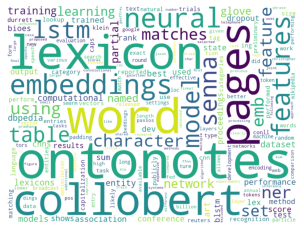

doc
citations 0.27395594526677547
ation 0.23129243345048764
eng 0.22272452527562828
ruif 0.22272452527562828
author 0.1982000427530524
aded 0.18263729684451696
oject 0.18263729684451696
profile 0.18263729684451696
publica 0.18263729684451696
publication 0.18263729684451696
view 0.15419495563365843
chinese 0.13213336183536828
tions 0.13213336183536828
public 0.11410772720254714
aduat 0.11136226263781414
conv 0.11136226263781414
dblp 0.11136226263781414
echnolog 0.11136226263781414
ectures 0.11136226263781414
ersation 0.11136226263781414
instit 0.11136226263781414
januar 0.11136226263781414
languag 0.11136226263781414
micr 0.11136226263781414
natu 0.11136226263781414


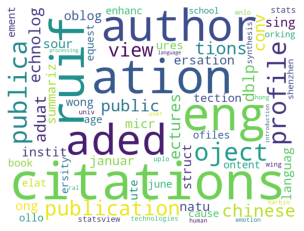

doc
medical 0.33557816307603183
word 0.27347189221713997
model 0.23700897325485462
chinese 0.2111148904168959
layer 0.20966178403314065
entity 0.2005460542925693
named 0.2005460542925693
models 0.16408313533028399
crf 0.15833616781267193
bilstm 0.1459035491634921
language 0.14216786265277104
recognition 0.13722467877098235
using 0.12762021636799864
task 0.11850448662742731
health 0.11672283933079368
records 0.11672283933079368
ner 0.11611318972929276
dataset 0.109388756886856
embedding 0.109388756886856
score 0.109388756886856
ehr 0.10675683209809943
neural 0.10027302714628465
including 0.09500170068760315
based 0.09115729740571332
hospital 0.08896402674841618


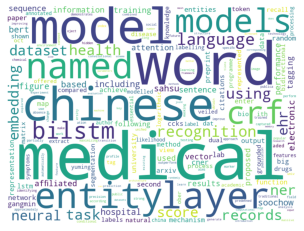

doc
language 0.343758906544273
masking 0.3326321913348134
chinese 0.3019073542233372
macbert 0.22125923850097093
bert 0.194028657902999
models 0.1700355324363204
word 0.1700355324363204
use 0.16247839766137281
mlm 0.15119645060673337
model 0.1473641281114777
task 0.13602842594905634
reading 0.13305287653392536
training 0.12469272378663497
electra 0.11062961925048546
original 0.10202131946179224
results 0.10202131946179224
sentence 0.10202131946179224
tokens 0.1006357847411124
comprehension 0.08467001233977069
similar 0.08312848252442331
replaced 0.08169627701178905
computational 0.07934991513694953
natural 0.07934991513694953
classiﬁcation 0.07862215431550136
tasks 0.07438297133038742


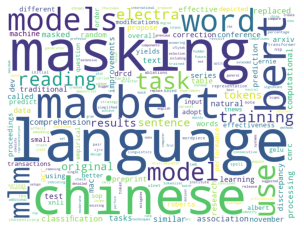

In [113]:
stop = text.ENGLISH_STOP_WORDS
tfIdfVectorizer=TfidfVectorizer(tokenizer=tokenize,stop_words=stop)
tfIdf = tfIdfVectorizer.fit(corpus)
indices = np.argsort(tfIdfVectorizer.idf_)[::-1]
a = tfIdfVectorizer.get_feature_names()
#df = pd.DataFrame(tfIdf[0].T.todense(), index=a, columns=["TF-IDF"])
#df = df.sort_values('TF-IDF', ascending=False)
#print(df.head(25))
for doc in corpus:
    #print(' '.join(doc.split())[1:500])
    tdm = tfIdfVectorizer.transform([doc])
    dense = tdm.todense()
    episode = dense[0].tolist()[0]
    phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]
    sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
    phrase_score = [(a[word_id], score) for (word_id, score) in sorted_phrase_scores]
    phrase_score_dict = dict(phrase_score)
    for phrase, score in [(a[word_id], score) for (word_id, score) in sorted_phrase_scores][:25]:
       print(phrase, score)
    w = WordCloud(width=800,height=600,mode='RGBA',background_color='white').fit_words(phrase_score_dict)
    plt.imshow(w)
    plt.axis("off")
    plt.show()